In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
#Load data
df=pd.read_csv("C:\\Users\\HP\\Downloads\\Mall_customer.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#Interpretation
Dataset contains information about 200 mall customers.
Each customer has 5 attributes: unique ID, gender, age, annual income, and spending score.
Data is clean (no missing values) and suitable for clustering or segmentation tasks.
The categorical variable (Gender) will need encoding if we want to use it in machine learning.
The numeric variables (Age, Income, Spending Score) can be directly used for analysis and clustering.

In [5]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


#interpretation
The dataset contains information about 200 mall customers, including their age, annual income, and spending score. The age of customers ranges from 18 to 70 years, with an average of around 39 years, which shows that both young and middle-aged customers are well represented. Annual income varies widely from 15k$ to 137k$, with an average of about 60k$, indicating a diverse customer base in terms of purchasing power. The spending score also shows significant variation, ranging from 1 to 99, with an average of 50, meaning the dataset includes low, medium, and high spenders. Overall, the wide range in income and spending behavior makes this dataset highly suitable for customer segmentation analysis, as it captures distinct groups of shoppers with different characteristics.

In [6]:
#useful features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
#Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

,copy,True
,with_mean,True
,with_std,True


copy=True → The scaler will keep the original dataset unchanged and create a scaled version.
with_mean=True → Each feature will be centered by subtracting the mean, so the new scaled features will have a mean of 0.
with_std=True → Each feature will also be divided by its standard deviation, so the new scaled features will have a standard deviation of 1.
scaler is set up to transform data so that all selected variables have mean = 0 and standard deviation = 1, which makes them comparable in clustering.

In [8]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

Each row in the array represents a customer after scaling.
Each column corresponds to one feature (likely Age, Annual Income, Spending Score).
The first customer has values [-1.42, -1.73, -0.43].
This means their Age and Annual Income are much lower than average (negative values), and their Spending Score is also slightly below average.
The second customer has [-1.28, -1.73, 1.19].
Their Age and Income are low, but their Spending Score is well above average.
The 9th customer has [1.80, -1.58, -1.83].
They are older than average, with low income, and a very low spending score.
The 64th customer has [2.23, -0.55, 0.22].
They are much older than average, with slightly below-average income, but their spending score is around average.

In [9]:
#using Elbow method for optimal k
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):  # Trying cluster numbers from 2 to 10
 kmeans = KMeans(n_clusters=i, random_state=42)   

In [10]:
#fit the model
kmeans.fit(X_scaled)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


The KMeans model was initialized to test different cluster numbers (k = 2 to 10) using the elbow method. It applies the k-means++ initialization for efficient center selection, runs up to 300 iterations with a convergence tolerance of 0.0001, and ensures reproducibility through random_state = 42. For each k, the model records the within-cluster sum of squares (WCSS), which will later be plotted to identify the optimal number of clusters by locating the “elbow point.”

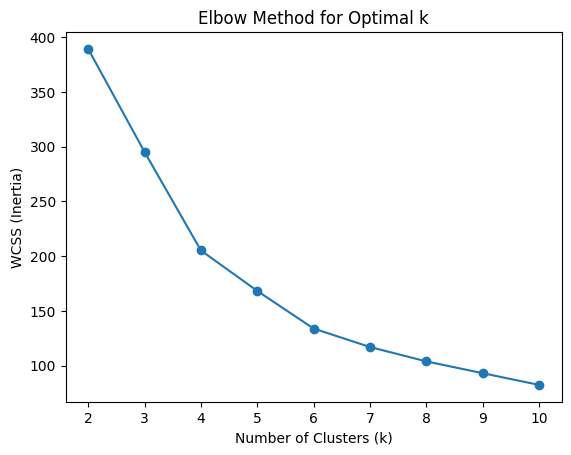

In [11]:
from sklearn.cluster import KMeans


wcss = []

for i in range(2, 11):  
 kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
 kmeans.fit(X_scaled)                
 wcss.append(kmeans.inertia_) 
    
# Plot Within-cluster sum of squares vs k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()
  

The graph shows the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k). As k increases, the WCSS decreases because more clusters reduce the distance between data points and their centroids. However, after a certain point, the rate of improvement slows down — this is the “elbow.”
 The clear elbow is around k = 5. Up to 5 clusters, WCSS decreases sharply, but after that, the curve flattens. This means that using more than 5 clusters doesn’t add much value.
So, the optimal number of clusters for  customer segmentation is 5.

In [12]:
#Train k-means model
# Train model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Show counts
print(df['Cluster'].value_counts())



Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


The K-means model with 5 clusters has divided the dataset into customer groups of different sizes
The largest segment (Cluster 0) includes customers with moderate income and average spending, representing the typical customer profile. Cluster 1 contains individuals with high income but relatively low spending, making them potential customers who could be targeted to increase sales. Cluster 2, the smallest group, represents customers with lower income but surprisingly high spending, often considered impulsive or younger buyers. Cluster 3 consists of high-income and high-spending customers, making them the most valuable group for the business. Finally, Cluster 4 includes low-income and low-spending customers, reflecting more budget-conscious shoppers.

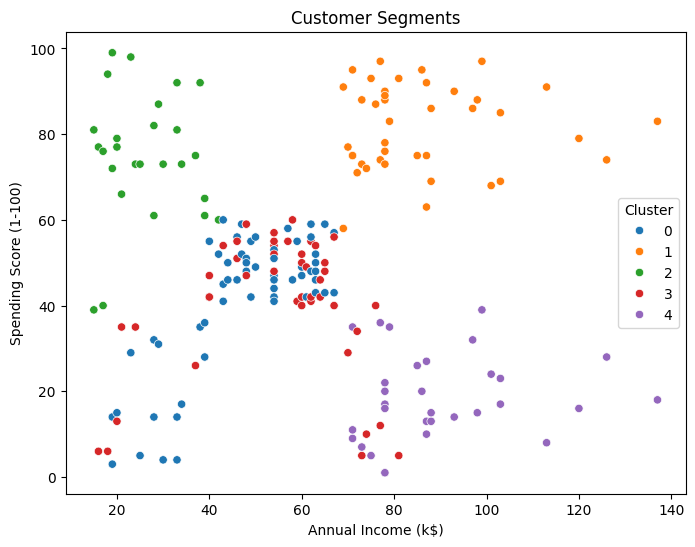

In [13]:
#visualization
from sklearn.metrics import silhouette_score
# Plot Annual Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='tab10')
plt.title("Customer Segments")
plt.show()


#Interpretation
The scatter plot illustrates the results of K-Means clustering, where customers are divided into five distinct groups based on their annual income and spending score. Cluster analysis shows that customers with high income and high spending (orange) represent the most valuable group, while those with low income and low spending (blue) contribute the least. The purple cluster reflects high-income but low-spending individuals, indicating untapped potential, whereas the green cluster consists of average-income yet high-spending customers who are also highly valuable. Finally, the red cluster represents moderate customers with average income and average spending patterns. This segmentation provides useful insights for targeted marketing and customer relationship strategies.

In [14]:
# Summary statistics for each cluster
summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print(summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


#Interpretation
The cluster analysis reveals five distinct customer groups. Cluster 1 consists of young, high-income individuals who spend the most and represent the most valuable segment, while Cluster 2 includes younger, low-income customers who also show high spending behavior. Cluster 4 represents middle-aged, high-income individuals with low spending, highlighting untapped potential. In contrast, Cluster 0 comprises older customers with low income and low spending, and Cluster 3 consists of younger customers with average income and moderate spending, making them lower-priority segments.